In [ ]:
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

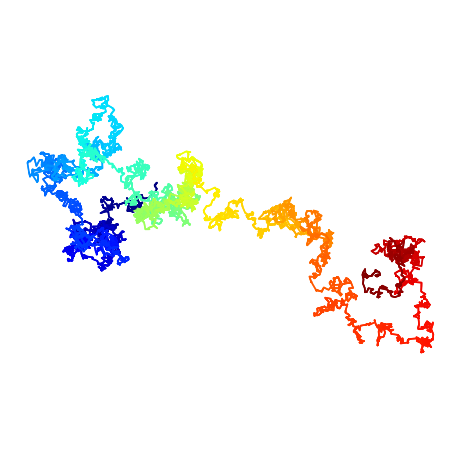

In [ ]:
n = 5000
x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)

fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.scatter(x2, y2, c = range(n * k), linewidths = 0,
           marker = 'o', s = 3, cmap = plt.cm.jet)
ax.axis('equal')
ax.set_axis_off()

Dimensión fractal: 2.0


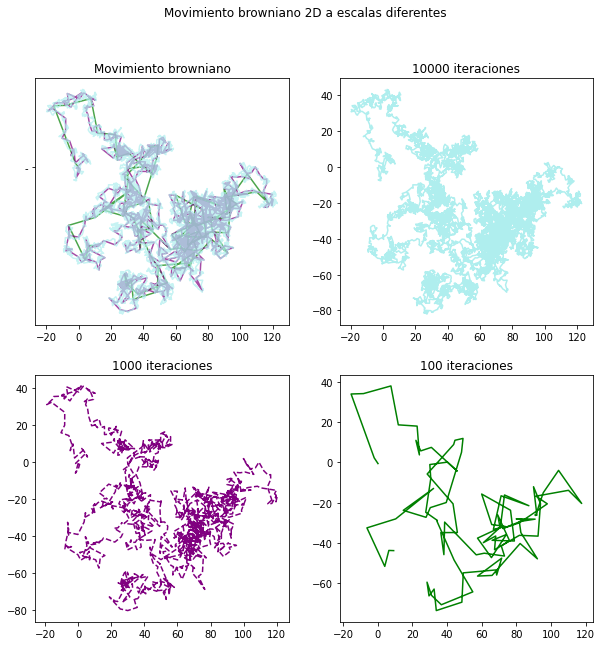

In [ ]:
k = 10 #Factor de cambio de resolución de observación

n_r1 = 10000 #Número máximo de iteraciones
n_r10 = n_r1 / pow(k,2) #Iteraciones reducidas en una escala de 100
n_r100 = n_r1 / pow(k,3) #Iteraciones reducidas en una escala de 1000

#Valores aleatorios para movimiento brownianno de n_r1 iteraciones:
x_r1 = np.cumsum(np.random.randn(n_r1)) #Dimensión horizontal
y_r1 = np.cumsum(np.random.randn(n_r1)) #Dimensión vertical

#Listas vacías que contendrán las iteraciones para resoluciones de 10 y 100:
x_r10 = [] #Resolución 10 (n_r10 iteraciones), dimensión horizontal
y_r10 = [] #Resolución 10 (n_r10 iteraciones), dimensión vertical
x_r100 = [] #Resolución 100 (n_r100 iteraciones), dimensión horizontal
y_r100 = [] #Resolución 100 (n_r100 iteraciones), dimensión vertical


for j in range(n_r1): #Bucle para apendización de las resoluciones aumentadas
  if j % n_r100 == 0: #Filtrar las iteraciones para obtener n_r1 / n_r100 en total
    x_r10.append(x_r1[j]) #Registrar las iteraciones en r10 horizontal
    y_r10.append(y_r1[j]) #Registrar las iteraciones en r10 vertical
  if j % n_r10 == 0: #Filtrar las iteraciones para obtener n_r1 / n_r10 en total
    x_r100.append(x_r1[j]) #Registrar las iteraciones en r100 horizontal
    y_r100.append(y_r1[j]) #Registrar las iteraciones en r100 vertical

fig, ax = plt.subplots(2, 2, figsize = (10, 10)) #Definir arreglo y tamaño de subfiguras
fig.suptitle('Movimiento browniano 2D a escalas diferentes') #Título principal

ax[0,0].plot(x_r100, y_r100, 'green', x_r10, y_r10, 'purple', x_r1, y_r1, 'paleturquoise', '-', alpha = 0.7)
ax[0,0].set_title('Movimiento browniano')

ax[0,1].plot(x_r1, y_r1, '-', color = 'paleturquoise')
ax[0,1].set_title(f'{n_r1} iteraciones')

ax[1,0].plot(x_r10, y_r10, '--', color = 'purple')
ax[1,0].set_title(f'{int(10 * n_r10)} iteraciones')

ax[1,1].plot(x_r100, y_r100, '-', color = 'green')
ax[1,1].set_title(f'{int(10 * n_r100)} iteraciones')

D_H = abs(np.log10(n_r10)/np.log10(1/k)) #Dimensión fractal
print(f'Dimensión fractal: {D_H}') #Imprimir dimensión fractal
plt.savefig("MB2D.png")

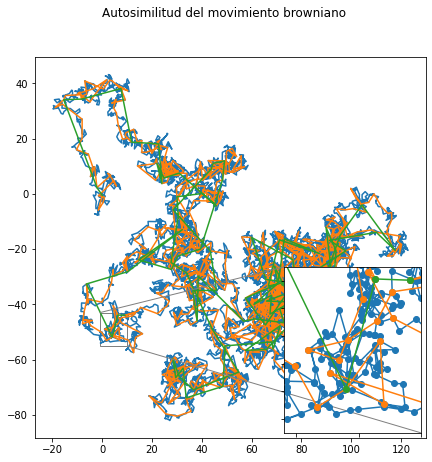

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (7,7))
ax.plot(x_r1, y_r1, '-', x_r10, y_r10, '-', x_r100, y_r100, '-')

axins = zoomed_inset_axes(ax, 5, loc = 4)
axins.plot(x_r1, y_r1, '-o', x_r10, y_r10, '-o', x_r100, y_r100, '-o')
axins.set_xlim(-1, 10)
axins.set_ylim(-55, -43)

plt.xticks(visible = False)
plt.yticks(visible = False)

mark_inset(ax, axins, loc1 = 2, loc2 = 4, fc = "none", ec = "0.5")
fig.suptitle('Autosimilitud del movimiento browniano')
plt.draw()
plt.show()
plt.savefig("MB2DZOOM.png")

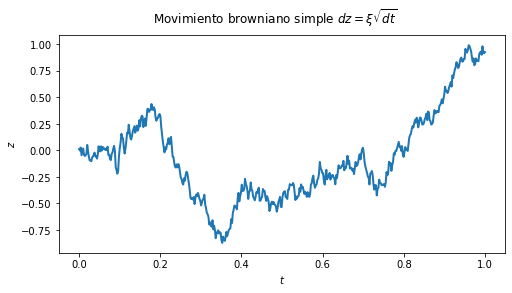

In [ ]:
T = 1
n = 500
dt = T/n
t = np.linspace(0, T, n)
z = np.cumsum(np.sqrt(dt) * np.random.randn(n))

fig, ax = plt.subplots(1, 1, figsize = (8, 4))
ax.plot(t, z, lw = 2)
plt.xlabel("$t$")
plt.ylabel("$z$")
fig.suptitle('Movimiento browniano simple $dz = ξ \sqrt{dt}$')
plt.savefig("MBTEMP1.png")

Text(0, 0.5, '$(\\Delta x)^2$')

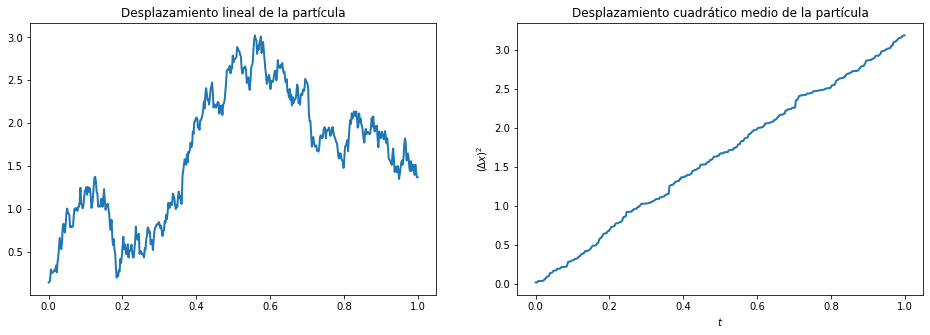

In [ ]:
T = 1
n = 500
dt = T/n
a = 0.4
b = 1.8
t = np.linspace(0, T, n)
dz = np.sqrt(dt) * np.random.randn(1, n)
dx = a * dt + b * dz

x = np.cumsum(dx)
x_quadratic = np.cumsum((dx)**2)

fig, ax = plt.subplots(1, 2, figsize = (16,5))

ax[0].plot(t, x, lw = 2)
ax[0].set_title('Desplazamiento lineal de la partícula')
plt.xlabel("$t$")
plt.ylabel("$(\Delta x)^2$")

ax[1].plot(t, x_quadratic, lw = 2)
ax[1].set_title('Desplazamiento cuadrático medio de la partícula')
plt.xlabel("$t$")
plt.ylabel("$(\Delta x)^2$")
plt.savefig("MBTEMP1.png")

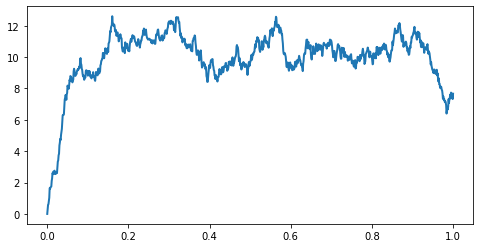

In [ ]:
sigma = 1 #Desviación estándar
mu = 10 #Media
tau = 0.05 #Constante temporal

dt = 0.001 #Tamaño de partición temporal
T = 1 #Tiempo total
n = int(T / dt) #Número de particiones temporales
t = np.linspace(0, T, n) #Línea de tiempo
sigma_bits = sigma * np.sqrt(2 / tau) #Parámetro constante de la parte estocástica
sqrtdt = np.sqrt(dt) #Variable de la parte estocástica

x = np.zeros(n) #Lista para datos del gráfico

for i in range(n - 1):
  x[i+1] = x[i] + dt * (-(x[i] - mu) / tau) + sigma_bits * sqrtdt * np.random.randn() #Ecuación de Ito

fig, ax = plt.subplots(1, 1, figsize = (8,4)) #Grafiación
ax.plot(t, x, lw = 2) #Grafiación
plt.savefig("MBTEMP1.png") #Guardar figura

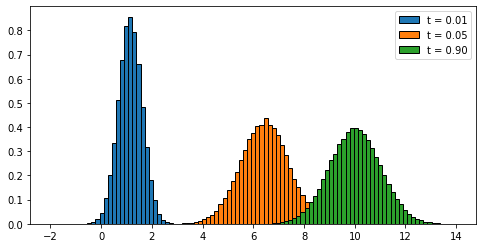

In [ ]:
ntrials = 100000 #Número de iteraciones
X = np.zeros(ntrials) #Lista para datos de histograma

bins = np.linspace(-2, 14, 100) #Barras de histogramas
fig, ax = plt.subplots(1, 1, figsize = (8, 4)) #Grafiación
for i in range(n):
  X += dt * (-(X-mu) / tau) + sigma_bits * sqrtdt * np.random.randn(ntrials) #Ecuación de Ito
  if i in (5, 50, 900):
    ax.hist(X, density = True, bins = bins, label = f't = {i * dt:.2f}', edgecolor = 'black') #Graficación
    ax.legend() #Leyendas
plt.savefig("HIST(t).png") #Guardar figura

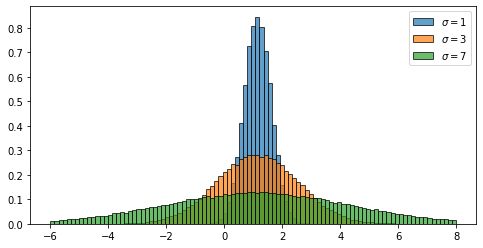

In [ ]:
bins = np.linspace(-6, 8, 100) #Barras del histograma
fig, ax = plt.subplots(1, 1, figsize = (8, 4)) #Grafiación
for j in (1, 3, 7):
  sigma = j #Desviación estándar
  mu = 10 #Media
  tau = 0.05 #Constante temporal

  dt = 0.001 #Tamaño de partición temporal
  T = 1 #Tiempo total
  n = int(T / dt) #Número de particiones temporales
  t = np.linspace(0, T, n) #Línea de tiempo
  sigma_bits = sigma * np.sqrt(2 / tau) #Parámetro constante de la parte estocástica
  sqrtdt = np.sqrt(dt) #Variable de la parte estocástica

  ntrials = 100000 #Número de iteraciones
  X = np.zeros(ntrials) #Lista para histograma
  for i in range(n):
    X += dt * (-(X-mu) / tau) + sigma_bits * sqrtdt * np.random.randn(ntrials) #Ecuación de ito
    if i == 5:
      ax.hist(X, density = True, bins = bins, edgecolor = 'black', alpha = 0.7, label = f'$\sigma = {sigma}$') #Grafiación del histograma
      ax.legend() #Leyendas
plt.savefig("Hist(sigma).png") #Guardar figura

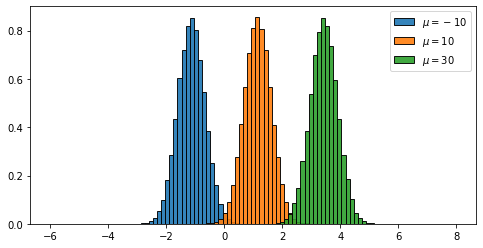

In [ ]:
bins = np.linspace(-6, 8, 100) #Barras del histograma
fig, ax = plt.subplots(1, 1, figsize = (8, 4)) #Grafiación
c = ['orange', 'purple', 'gray']
for j in (-10, 10, 30):
  sigma = 1 #Desviación estándar
  mu = j #Media
  tau = 0.05 #Constante temporal

  dt = 0.001 #Tamaño de partición temporal
  T = 1 #Tiempo total
  n = int(T / dt) #Número de particiones temporales
  t = np.linspace(0, T, n) #Línea de tiempo
  sigma_bits = sigma * np.sqrt(2 / tau) #Parámetro constante de la parte estocástica
  sqrtdt = np.sqrt(dt) #Variable de la parte estocástica

  ntrials = 100000 #Número de iteraciones
  X = np.zeros(ntrials) #Lista para histograma
  for i in range(n):
    X += dt * (-(X-mu) / tau) + sigma_bits * sqrtdt * np.random.randn(ntrials) #Ecuación de ito
    if i == 5:
      ax.hist(X, density = True, bins = bins, edgecolor = 'black', alpha = 0.9, label = f'$\mu = {mu}$') #Grafiación del histograma
      ax.legend() #Leyendas
plt.savefig("Hist(mu).png") #Guardar figura